<a href="https://colab.research.google.com/github/samaramms/MonkeypoxTraining/blob/main/Monkeypox_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I - Importando as bibliotecas a serem utilizadas:**





In [298]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib



# **II - Importando os dataframes a serem analisados:**

1 - Casos Mundiais

In [299]:
df_monkeypox_world = pd.read_csv("/content/Monkey_Pox_Cases_Worldwide.csv")
df_monkeypox_world

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,3383.0,0.0,5.0,2.0,7.0
1,Portugal,908.0,0.0,0.0,0.0,34.0
2,Spain,7037.0,0.0,13.0,2.0,0.0
3,United States,23340.0,0.0,4.0,41.0,11.0
4,Canada,1362.0,12.0,1.0,5.0,0.0
...,...,...,...,...,...,...
122,Central African Republic,8.0,9.0,0.0,0.0,0.0
123,Republic of Congo,3.0,5.0,0.0,0.0,0.0
124,Cameroon,7.0,27.0,0.0,0.0,0.0
125,Liberia,2.0,0.0,0.0,0.0,0.0


In [300]:
df_monkeypox_world.shape #linhas e colunas, respectivamente, no dataset

(127, 6)

In [301]:
df_monkeypox_world.columns #o que há em cada coluna

Index(['Country', 'Confirmed_Cases', 'Suspected_Cases', 'Hospitalized',
       'Travel_History_Yes', 'Travel_History_No'],
      dtype='object')

In [302]:
df_monkeypox_world.isnull().sum() #verificando se há algum arquivo NaN/nulo/sem dados. Não há.

Country               0
Confirmed_Cases       0
Suspected_Cases       0
Hospitalized          0
Travel_History_Yes    0
Travel_History_No     0
dtype: int64

In [303]:
df_monkeypox_world.describe()

,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
count,127.000000,127.000000,127.000000,127.000000,127.000000
mean,490.370079,28.921260,1.181102,2.125984,0.708661
std,2293.765961,256.835832,2.815539,4.792508,3.539147
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,1.000000,0.000000
75%,72.000000,0.000000,1.000000,2.500000,0.000000
max,23340.000000,2852.000000,18.000000,41.000000,34.000000


2 - Casos ao longo do tempo

In [304]:
casos_tempo = pd.read_csv("/content/Worldwide_Case_Detection_Timeline.csv")
casos_tempo

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
4,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
62597,2022-09-16,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62598,2022-09-16,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62599,2022-09-16,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62600,2022-09-16,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [305]:
casos_tempo.columns

Index(['Date_confirmation', 'Country', 'City', 'Age', 'Gender', 'Symptoms',
       'Hospitalised (Y/N/NA)', 'Isolated (Y/N/NA)',
       'Travel_history (Y/N/NA)'],
      dtype='object')

In [306]:
casos_tempo.isnull().sum() 
#nota: aqui há dados faltantes, entretanto, para esse caso, remover alguns objetos NaN pode levar a uma analise precipitada dos nosso dados

Date_confirmation              0
Country                        0
City                       61370
Age                        59726
Gender                     60218
Symptoms                   62412
Hospitalised (Y/N/NA)      62277
Isolated (Y/N/NA)          62161
Travel_history (Y/N/NA)    62269
dtype: int64

In [307]:
casos_tempo.describe()

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
count,62602,62602,1232,2876,2384,190,325,441,333
unique,135,110,164,90,5,92,2,1,2
top,2022-08-22,United States,Toronto,20-69,male,genital ulcer lesions,N,Y,Y
freq,2063,23598,479,615,2344,30,197,441,245


**III - Tratamento e seleção dos dados a trabalhar:**

In [308]:
#traduzindo as colunas pro português (Os países seguem com nome em ingles)

renomear = {'Country' : 'País',
            'Confirmed_Cases': 'Casos Confirmados',
            'Suspected_Cases':'Casos Suspeitos',
            'Hospitalized' : 'Hospitalizados',
            'Travel_History_Yes': 'Viagem: Positivo', 
            'Travel_History_No' : 'Viagem: Negativo'}

In [309]:
df_monkeypox_world.rename(columns = renomear, inplace = True)
df_monkeypox_world


,País,Casos Confirmados,Casos Suspeitos,Hospitalizados,Viagem: Positivo,Viagem: Negativo
0,England,3383.0,0.0,5.0,2.0,7.0
1,Portugal,908.0,0.0,0.0,0.0,34.0
2,Spain,7037.0,0.0,13.0,2.0,0.0
3,United States,23340.0,0.0,4.0,41.0,11.0
4,Canada,1362.0,12.0,1.0,5.0,0.0
...,...,...,...,...,...,...
122,Central African Republic,8.0,9.0,0.0,0.0,0.0
123,Republic of Congo,3.0,5.0,0.0,0.0,0.0
124,Cameroon,7.0,27.0,0.0,0.0,0.0
125,Liberia,2.0,0.0,0.0,0.0,0.0


In [310]:
casos_mundiais = df_monkeypox_world
casos_mundiais 

,País,Casos Confirmados,Casos Suspeitos,Hospitalizados,Viagem: Positivo,Viagem: Negativo
0,England,3383.0,0.0,5.0,2.0,7.0
1,Portugal,908.0,0.0,0.0,0.0,34.0
2,Spain,7037.0,0.0,13.0,2.0,0.0
3,United States,23340.0,0.0,4.0,41.0,11.0
4,Canada,1362.0,12.0,1.0,5.0,0.0
...,...,...,...,...,...,...
122,Central African Republic,8.0,9.0,0.0,0.0,0.0
123,Republic of Congo,3.0,5.0,0.0,0.0,0.0
124,Cameroon,7.0,27.0,0.0,0.0,0.0
125,Liberia,2.0,0.0,0.0,0.0,0.0


In [311]:
casos_mundiais["País"].unique() #vendo os países que compõem essa series

array(['England', 'Portugal', 'Spain', 'United States', 'Canada',
       'Sweden', 'Italy', 'France', 'Belgium', 'Australia', 'Germany',
       'Netherlands', 'Israel', 'Switzerland', 'Greece', 'Austria',
       'Argentina', 'Denmark', 'Morocco', 'Slovenia', 'Scotland',
       'Czech Republic', 'United Arab Emirates', 'Finland', 'Wales',
       'Northern Ireland', 'Sudan', 'Bolivia', 'Iran', 'Ecuador', 'Malta',
       'Ireland', 'Mexico', 'Pakistan', 'French Guiana', 'Thailand',
       'Peru', 'Brazil', 'Malaysia', 'Hungary', 'Norway', 'Paraguay',
       'Costa Rica', 'Gibraltar', 'Mauritius', 'Haiti', 'Uruguay',
       'Latvia', 'Cayman Islands', 'Kosovo', 'Turkey', 'Bahamas', 'Ghana',
       'India', 'Iceland', 'Poland', 'Bangladesh', 'Uganda', 'Cambodia',
       'Malawi', 'Venezuela', 'Romania', 'Georgia', 'Slovakia',
       'Luxembourg', 'Nepal', 'Chile', 'Serbia', 'Lebanon', 'South Korea',
       'Singapore', 'South Africa', 'Taiwan', 'Colombia', 'Croatia',
       'Bulgaria', 'Som

Casos ao longo do tempo:

In [312]:
casos_tempo.head(5)

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
4,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN


In [313]:
casos_tempo.drop(columns = ['Date_confirmation', 'City', 'Isolated (Y/N/NA)', 'Hospitalised (Y/N/NA)', 'Travel_history (Y/N/NA)' ], inplace = True)
casos_tempo

,Country,Age,Gender,Symptoms
0,Nigeria,NaN,NaN,NaN
1,Nigeria,NaN,NaN,NaN
2,Nigeria,NaN,NaN,NaN
3,Cameroon,0-39,NaN,NaN
4,Cameroon,0-39,NaN,NaN
...,...,...,...,...
62597,United States,NaN,NaN,NaN
62598,United States,NaN,NaN,NaN
62599,United States,NaN,NaN,NaN
62600,United States,NaN,NaN,NaN


In [314]:
casos_tempo.columns

Index(['Country', 'Age', 'Gender', 'Symptoms'], dtype='object')

In [315]:
renomear_2 ={'Country' : 'País',
            'Age': 'Idade',
            'Gender':'Gênero',
            'Symptoms' : 'Sintomas'}
    

In [316]:
casos_tempo.rename(columns = renomear_2, inplace = True)
casos_tempo


,País,Idade,Gênero,Sintomas
0,Nigeria,NaN,NaN,NaN
1,Nigeria,NaN,NaN,NaN
2,Nigeria,NaN,NaN,NaN
3,Cameroon,0-39,NaN,NaN
4,Cameroon,0-39,NaN,NaN
...,...,...,...,...
62597,United States,NaN,NaN,NaN
62598,United States,NaN,NaN,NaN
62599,United States,NaN,NaN,NaN
62600,United States,NaN,NaN,NaN


# **III - Começando algumas visualizações**

a)
 Os 10 países com maior número de casos

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

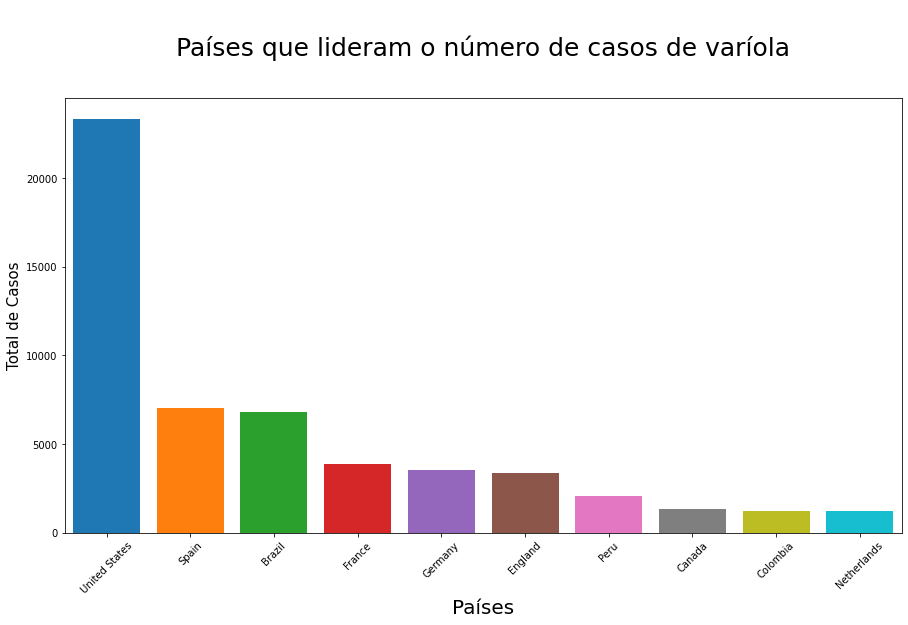

In [317]:
plt.subplots(figsize=(15,8))
casos_mundiais = casos_mundiais.sort_values(["Casos Confirmados"], ascending = False)[:10]
plot = sns.barplot(x=casos_mundiais["País"][:10],y=casos_mundiais["Casos Confirmados"], saturation=1)
plot.axes.set_title("\nPaíses que lideram o número de casos de varíola\n",fontsize= 25, pad = 15)
plt.xlabel("Países", fontsize = 20)
plt.ylabel("Total de Casos", fontsize = 15)
plt.xticks(rotation=45)

b) Os 10 países com mais hospitalizações

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

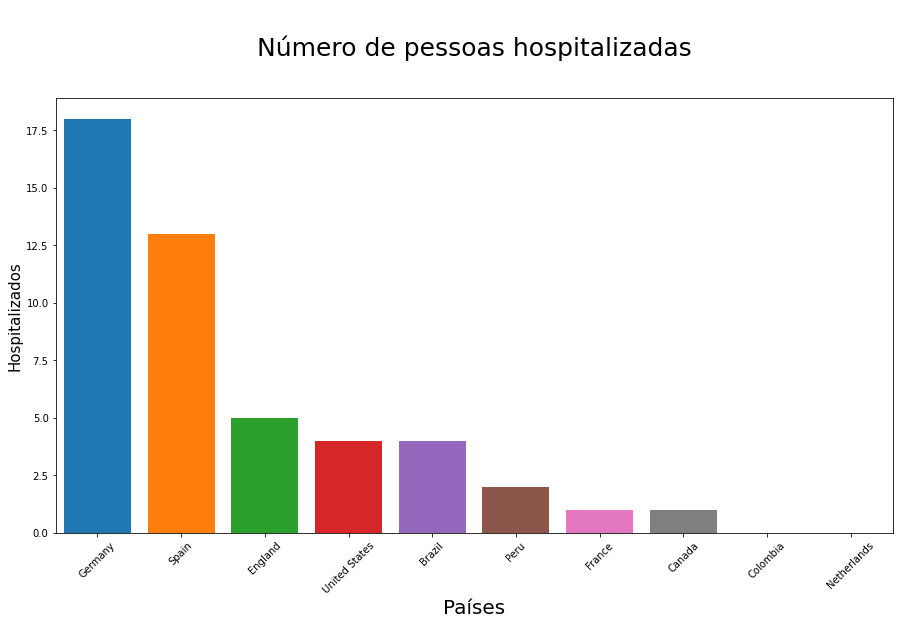

In [318]:
plt.subplots(figsize=(15,8))
casos_mundiais = casos_mundiais.sort_values(["Hospitalizados"], ascending = False)[:10]

plot = sns.barplot(x=casos_mundiais["País"][:10],y=casos_mundiais["Hospitalizados"], saturation=3)
plot.axes.set_title("\nNúmero de pessoas hospitalizadas\n",fontsize= 25, pad = 15)
plt.xlabel("Países", fontsize = 20)
plt.ylabel("Hospitalizados", fontsize = 15)
plt.xticks(rotation=45)

Mesmo com os altos números de Casos Confirmados, os casos hospitalizados ainda são baixos.
Apesar de os EUA liderarem o número de casos, a Alemanha possui o maior número de pessoas hospitalizadas

* Pessoas hospitalizadas x Casos Confirmados

In [319]:
porcentagem_hospitalizados = (casos_mundiais['Hospitalizados'].sum()/casos_mundiais['Casos Confirmados'].sum()) * 100
print('A porcentagem de pessoas hospitalizadas é de {}%'.format (porcentagem_hospitalizados.round(2)))

A porcentagem de pessoas hospitalizadas é de 0.09%


A baixa porcentagem de pessoas hospitalizadas pode nos dizer que a maioria das pessoas não tem sintomas tão graves que acabem precisando ser hospitalizadas. Entretanto, algumas pessoas podem não ir ao hospital em alguns países por não terem recursos financeiros. 

c) Buscando algumas correlações:

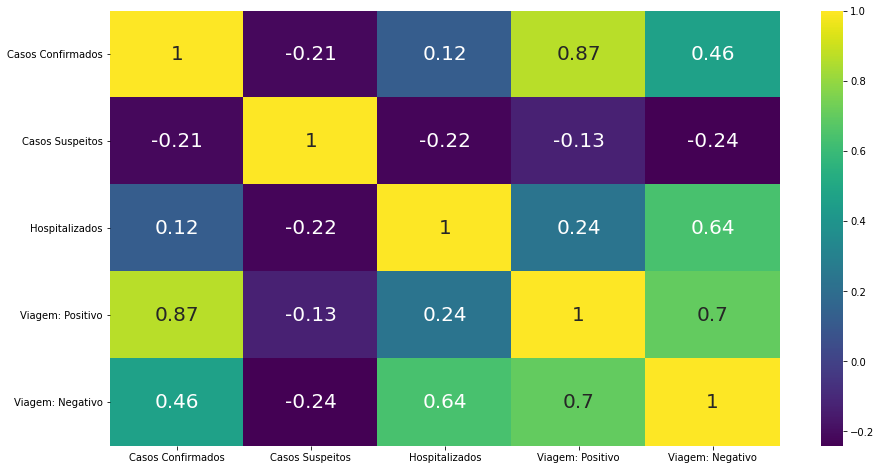

In [320]:
plt.figure(figsize=(15,8))

sns.heatmap(casos_mundiais.corr(),cmap = 'viridis', annot=True, annot_kws={"size": 20})
plt.show()

Segundo o heatmap acima, podemos ver que:
- Há uma forte correlação entre Pessoas que Viajaram e os Casos Confirmados. 
- Entretanto, o número de pessoas Hospitalizadas que NÃO viajaram curiosamente é maior do que os que Viajaram. Talvez as pessoas que Viajaram contaminaram Não Viajantes? Pois há uma forte correlação entre esses dois grupos.
- Nem sempre os Casos Suspeitos tornam-se Confirmados



d) E o Brasil?


In [321]:
casos_brasil = casos_mundiais.sort_values(["Casos Confirmados"], ascending = False)[2:3]
casos_brasil

,País,Casos Confirmados,Casos Suspeitos,Hospitalizados,Viagem: Positivo,Viagem: Negativo
37,Brazil,6807.0,0.0,4.0,20.0,4.0


In [342]:
cconf_brasil_globalhealth = casos_brasil['Casos Confirmados']
cconf_brasil_globalhealth

37    6807.0
Name: Casos Confirmados, dtype: float64

In [343]:
casos_brasil_mds= pd.read_csv('/content/monkeypox_160922 - Página1.csv') 
casos_brasil_mds.head(27)

,Estados,Casos Confirmados,Casos Suspeitos,Total Estado
0,Minas Gerais,417,787,1204
1,Espírito Santo,53,275,328
2,Rio de Janeiro,920,499,1419
3,São Paulo,3486,1063,4549
4,Santa Catarina,211,259,470
5,Paraná,153,300,453
6,Rio Grande do Sul,162,230,392
7,Goiás,391,499,890
8,Distrito Federal,231,194,425
9,Mato Grosso do Sul,88,69,157


Comentário: os dados obtidos do Ministério da Saúde foram retirados a partir do formato .pdf e convertidos em .csv por meio do PowerBI. Houve 1 morte no RJ e 1 morte em MG que no pdf estão representadas por '*', para não conflitar com o GeoDataFrame a ser feito, retirei o asterisco e decidi colocar sobre as mortes mais a frente.


In [345]:
cconf_brasil_mds = casos_brasil_mds['Casos Confirmados'].sum()
cconf_brasil_mds

6807

In [346]:
cconf_brasil_mds == cconf_brasil_globalhealth

37    True
Name: Casos Confirmados, dtype: bool

Podemos ver que tanto os dados do Ministério da Saúde quanto os do Health Organization estão sem conflitos.

* E como estão os casos pelo Brasil?


In [350]:
brasil = gpd.read_file('/content/BR_UF_2021.shp')
brasil

,CD_UF,NM_UF,SIGLA,NM_REGIAO,geometry
0,11,Rondônia,RO,Norte,"POLYGON ((-62.86662 -7.97587, -62.86017 -7.982..."
1,12,Acre,AC,Norte,"POLYGON ((-73.16550 -7.34166, -73.05480 -7.381..."
2,13,Amazonas,AM,Norte,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125..."
3,14,Roraima,RR,Norte,"POLYGON ((-60.20051 5.26434, -60.19828 5.26045..."
4,15,Pará,PA,Norte,"MULTIPOLYGON (((-46.43676 -1.01905, -46.43723 ..."
5,16,Amapá,AP,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2..."
6,17,Tocantins,TO,Norte,"POLYGON ((-48.35878 -5.17008, -48.35617 -5.171..."
7,21,Maranhão,MA,Nordeste,"MULTIPOLYGON (((-44.66115 -2.98018, -44.66157 ..."
8,22,Piauí,PI,Nordeste,"POLYGON ((-41.78076 -2.76078, -41.77935 -2.764..."
9,23,Ceará,CE,Nordeste,"POLYGON ((-40.49582 -2.78541, -40.49242 -2.787..."


In [327]:
#retirando as colunas para poder não conflitar com o outro DataFrame

In [351]:
brasil.drop(columns = ['CD_UF', 'SIGLA', 'NM_REGIAO'], inplace = True)
brasil

,NM_UF,geometry
0,Rondônia,"POLYGON ((-62.86662 -7.97587, -62.86017 -7.982..."
1,Acre,"POLYGON ((-73.16550 -7.34166, -73.05480 -7.381..."
2,Amazonas,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125..."
3,Roraima,"POLYGON ((-60.20051 5.26434, -60.19828 5.26045..."
4,Pará,"MULTIPOLYGON (((-46.43676 -1.01905, -46.43723 ..."
5,Amapá,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2..."
6,Tocantins,"POLYGON ((-48.35878 -5.17008, -48.35617 -5.171..."
7,Maranhão,"MULTIPOLYGON (((-44.66115 -2.98018, -44.66157 ..."
8,Piauí,"POLYGON ((-41.78076 -2.76078, -41.77935 -2.764..."
9,Ceará,"POLYGON ((-40.49582 -2.78541, -40.49242 -2.787..."


In [352]:
rename2 = {'NM_UF': 'Estados'}

brasil.rename(columns = rename2, inplace = True)
brasil

,Estados,geometry
0,Rondônia,"POLYGON ((-62.86662 -7.97587, -62.86017 -7.982..."
1,Acre,"POLYGON ((-73.16550 -7.34166, -73.05480 -7.381..."
2,Amazonas,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125..."
3,Roraima,"POLYGON ((-60.20051 5.26434, -60.19828 5.26045..."
4,Pará,"MULTIPOLYGON (((-46.43676 -1.01905, -46.43723 ..."
5,Amapá,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2..."
6,Tocantins,"POLYGON ((-48.35878 -5.17008, -48.35617 -5.171..."
7,Maranhão,"MULTIPOLYGON (((-44.66115 -2.98018, -44.66157 ..."
8,Piauí,"POLYGON ((-41.78076 -2.76078, -41.77935 -2.764..."
9,Ceará,"POLYGON ((-40.49582 -2.78541, -40.49242 -2.787..."


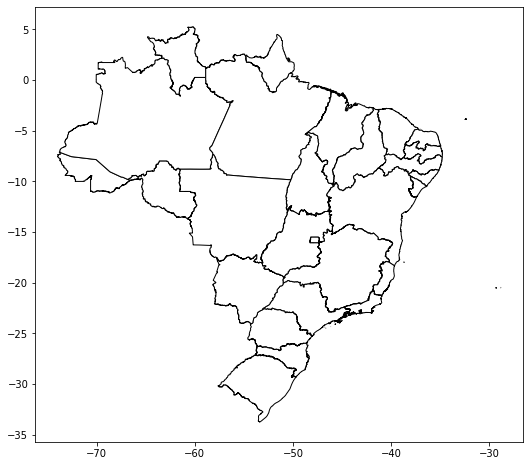

In [353]:
brasil.plot(color = 'white', edgecolor = 'black', figsize = (15,8))

In [331]:
#unindo os dois dataframes para criar a visualizacao do mapa acima com o n de casos

In [356]:
casos_estado_merge = pd.merge(casos_brasil_mds, brasil[['Estados', 'geometry']], on='Estados')
casos_estado_merge

,Estados,Casos Confirmados,Casos Suspeitos,Total Estado,geometry
0,Minas Gerais,417,787,1204,"POLYGON ((-44.20984 -14.24460, -44.20912 -14.2..."
1,Espírito Santo,53,275,328,"MULTIPOLYGON (((-40.88430 -21.16155, -40.88406..."
2,Rio de Janeiro,920,499,1419,"MULTIPOLYGON (((-44.71924 -23.35949, -44.71952..."
3,São Paulo,3486,1063,4549,"MULTIPOLYGON (((-48.03716 -25.35794, -48.03750..."
4,Santa Catarina,211,259,470,"MULTIPOLYGON (((-48.82118 -28.61095, -48.82125..."
5,Paraná,153,300,453,"MULTIPOLYGON (((-48.40736 -25.84270, -48.40750..."
6,Rio Grande do Sul,162,230,392,"MULTIPOLYGON (((-49.70392 -29.34774, -49.70402..."
7,Goiás,391,499,890,"POLYGON ((-50.15002 -12.39972, -50.15020 -12.3..."
8,Distrito Federal,231,194,425,"POLYGON ((-47.41734 -15.54655, -47.41720 -15.5..."
9,Mato Grosso do Sul,88,69,157,"POLYGON ((-56.10370 -17.17354, -56.10209 -17.1..."


In [ ]:
gdf = gpd.GeoDataFrame(casos_estado_merge)
gdf

In [428]:
norm = matplotlib.colors.BoundaryNorm([0, 25, 50, 100, 250, 500, 1500, 3000], cmap.N)

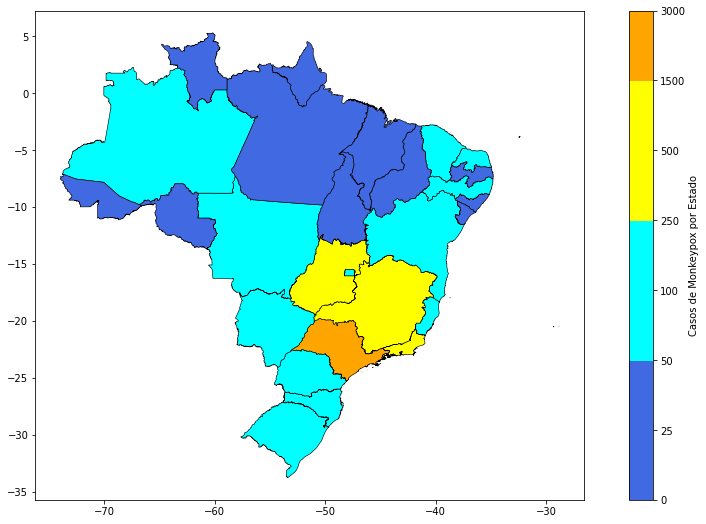

In [429]:
gdf.plot(column = 'Casos Confirmados', figsize=(16,9), 
         cmap = cmap, edgecolor = 'Black', linewidth=0.6, legend = True,
        legend_kwds={'label': "Casos de Monkeypox por Estado", 'orientation': "vertical"}, 
         norm=norm)

Com o mapa, conseguimos ver que São Paulo lidera disparadamente o número de casos no país, com mais de 3.486 casos, seguido pelo RJ (920). Enquanto isso, podemos ver que alguns estados do país não chegaram nem a notificar 50 casos, a exemplo do Pará.